In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE
from xgboost import plot_importance

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

The link to our dataset: https://www.kaggle.com/datasnaek/mbti-type

This dataset from Kaggle comes with two columns: the Myers-Briggs type of a user and 50 user posts stored as strings. Here is an example of the last 5 rows.

In [ ]:
data=pd.read_csv("drive/MyDrive/mbti_1.csv")
#data=pd.read_csv("mbti_1.csv")
data.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


Checking if there are any missing or null values present in the dataset.

In [ ]:
data.isnull().any()

type     False
posts    False
dtype: bool

The size of the dataset

In [ ]:
data.shape

(8675, 2)

Dataset Information

In [ ]:
data.dtypes

type     object
posts    object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


There are only 2 columns in the dataset
Total no. of rows are 8675
There are no null values present in the dataset
One Disadvantage is that all values are textual, hence they have to be converted to numerical form to train the ML model

In [ ]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


There are 16 unique personality type indicators in the dataset
INFP is the most frequently occuring personality type in our dataset
(no. of occurences is 1832)
Lastly, there are no repeating posts in the dataset


Now we finding the unique values from the 'type' of personality column

In [ ]:
cls=np.unique(np.array(data.iloc[:,0]))
cls

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
total=data.groupby(['type']).count()*50

Group by allows you to split your data into separate groups to perform computations for better analysis.

Data visualization for no. of posts for each personality type

Text(0.5, 1.0, 'Total posts for each personality type')

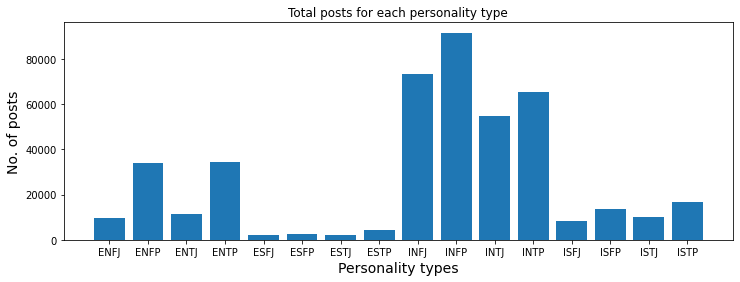

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(np.array(total.index),height=total['posts'],)
plt.xlabel('Personality types',size=14)
plt.ylabel('No. of posts
',size=14)
plt.title('Total posts for each personality type')

The dataset is clearly unbalanced throughout the different classes. We observe that some of the personality types has a lot more data than others, the most common Kaggle users personality is INFP (Introvert Intuition Feeling Perceiving)

However, we reach this conclusion based on user comments: we can consider for now that users who comment on social media more frequently are more intoverted, perceptive, and emotional.

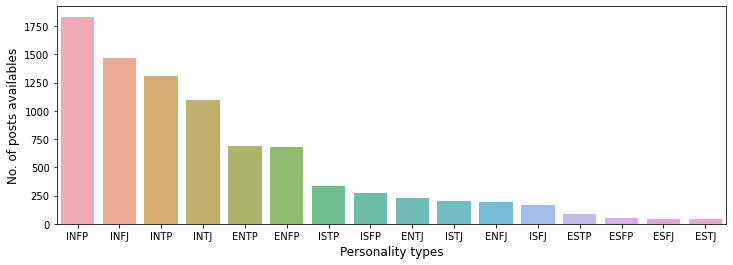

In [ ]:
#Plotting this in descending order for better understanding of this visualization
cnt=data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt.index,cnt.values,alpha=0.8)
plt.xlabel('Personality types',fontsize=12)
plt.ylabel('No. of posts availables',fontsize=12)
plt.show()

Since the original dataset only came with 2 features, the Type and 50 posts for each person, we decided to create additional features for exploring & analysing our dataset.

After we added our features, we did some data exploration to see how the raw data looks and to see how important our features were for distinguishing types across the MBTI personalities. Below are plots further showing the type imbalances in our data.

**SWARM PLOT**

Swarm Plots, also called beeswarm plots, they plot all of the data points

In [ ]:
#this function counts the no of words in each post of a user
def var_row(row):
  l=[]
  for i in row.split('|||'):
    l.append(len(i.split()))
  return np.var(l)

In [ ]:
data_cpy=data.copy()

In [ ]:
#this function counts the no of words per post out of the total 100 posts in the whole row
data_cpy['words_per_comment']=data_cpy['posts'].apply(lambda x:len(x.split())/100)
data_cpy['variance_of_word_counts']=data_cpy['posts'].apply(lambda x:var_row(x))

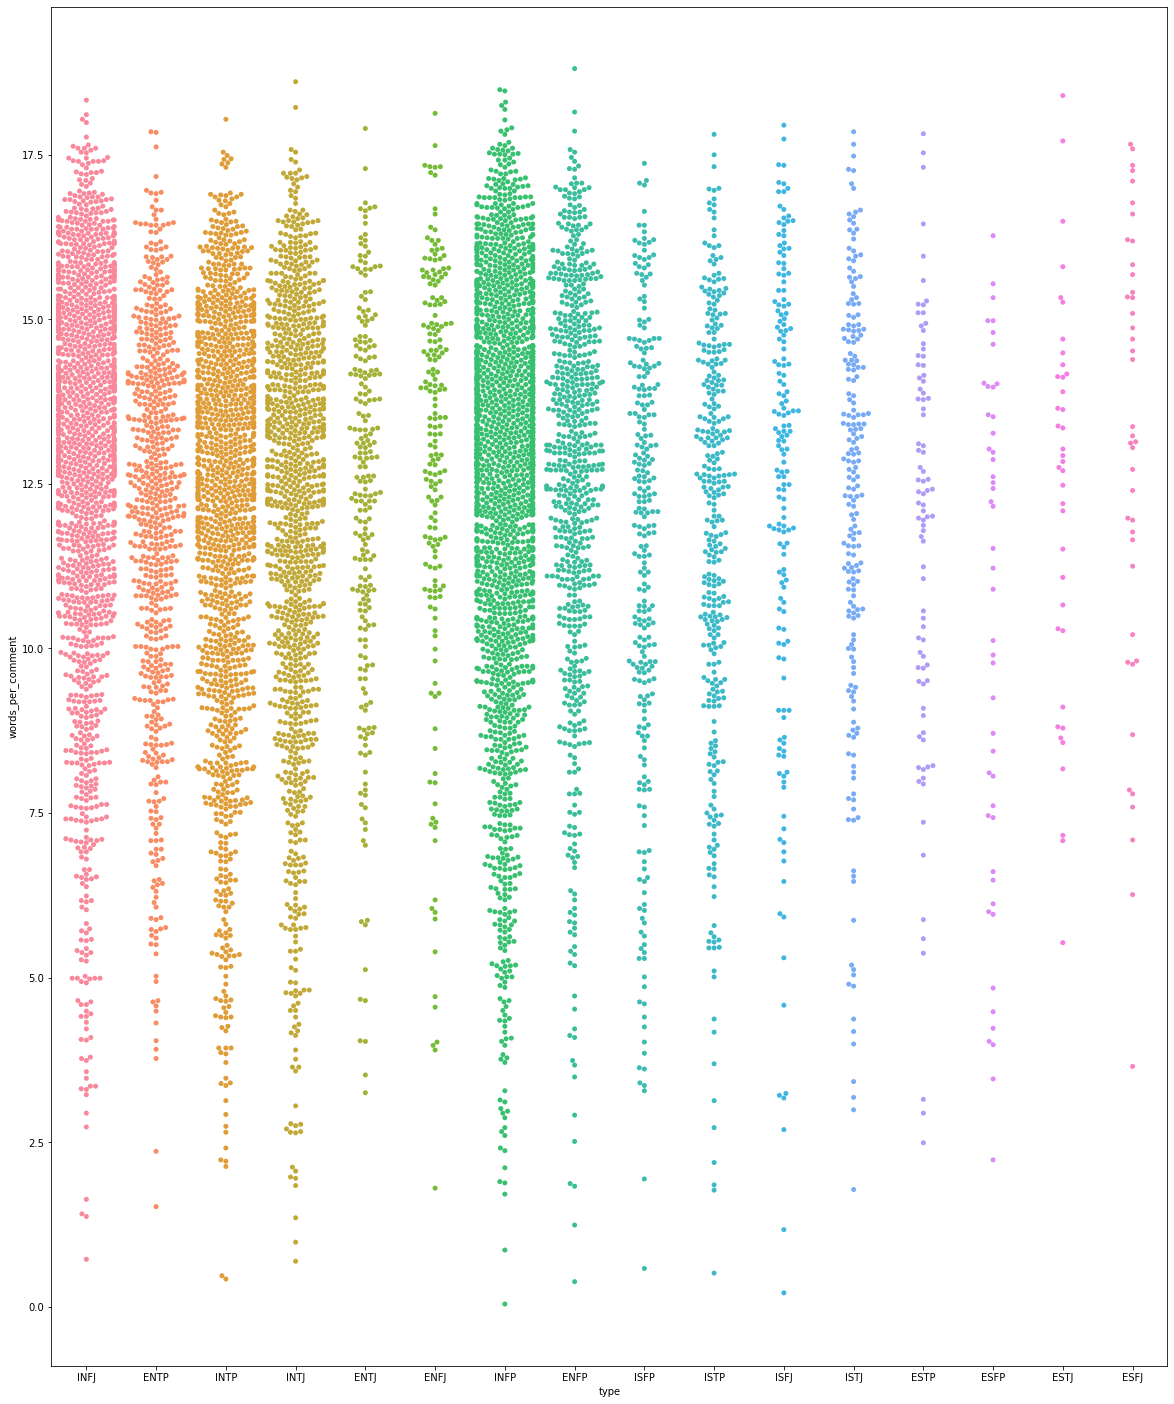

In [ ]:
plt.figure(figsize=(20,25))
sns.swarmplot("type","words_per_comment",data=data_cpy)

This plot further shows clearly that there are a no. of imbalances in our dataset, showing all the observations along with some representation of the underlying distribution using our added features.

INFP has the most cluttered showing there are most no. of comments of this type of personality

**JOINT PLOT**


Plotting the joint plot between the no. of words that occur in each comment v/s their variance

Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

A distribution plot at the top for the column on the x-axis, a distribution plot on the right for the column on the y-axis and a scatter plot in between that shows the mutual distribution of data for both the columns. The area below the histogram helps in calculating the PDF, i.e. Probability Density function and the highest peak of the curve is the mean of distribution.

<Figure size 1800x1800 with 0 Axes>

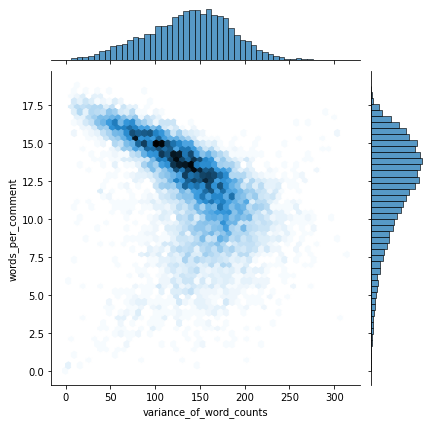

In [ ]:
plt.figure(figsize=(25,25))
sns.jointplot("variance_of_word_counts","words_per_comment",data=data_cpy,kind="hex")

The 2 histogram plots represent Gaussian distribution of a sample space, which in our case comprises of no. of words per comment and associated variance of word counts from our dataset.
In the hexagonal plot, the hexagon with most number of points gets darker color. So if you look at the above plot, you can see that most of the posts have words between 100 and 150 and most of no. of words per comment by a user is between 25-30.
We can see that there is no correlation observed between variance of word count and the words per comment.
There is a strong relationship when there are 25-30 words per comment & the variance of word counts is 100-150
This is also visible by analyzing the histogram plots on both the axis.


Now we see the Joint Plots for each Personality Type

<Figure size 2016x360 with 0 Axes>

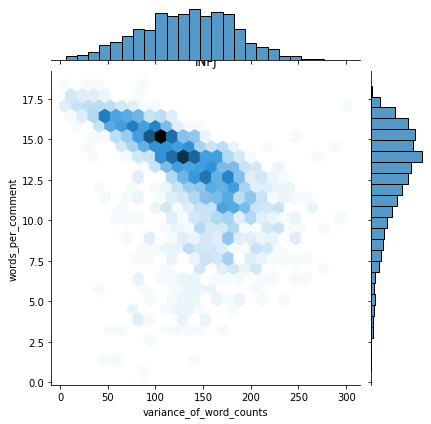

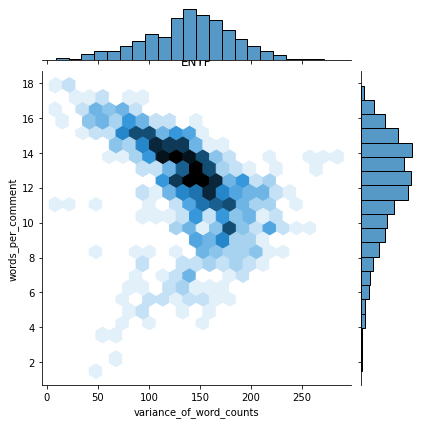

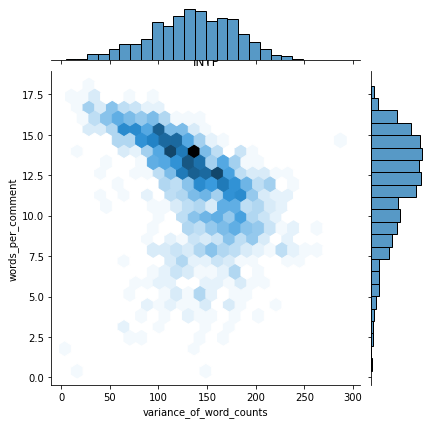

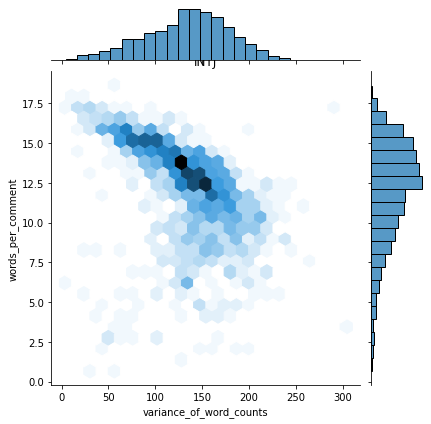

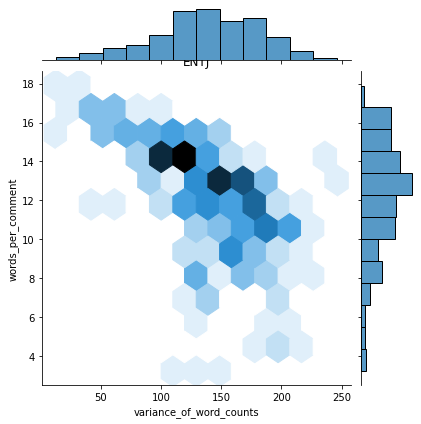

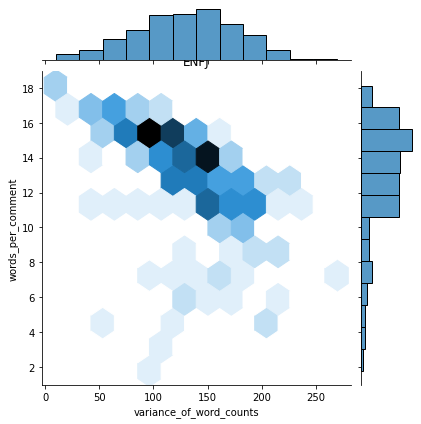

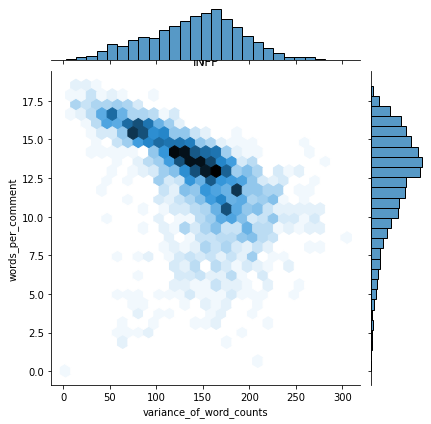

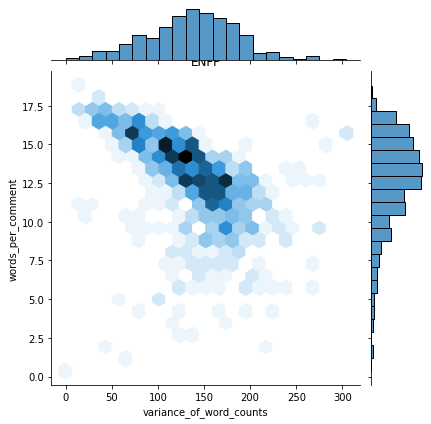

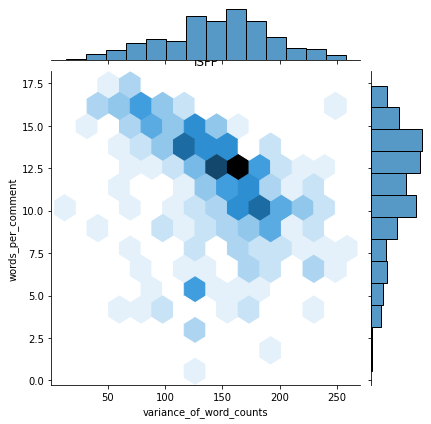

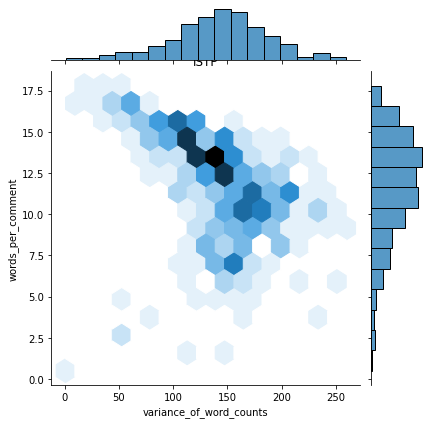

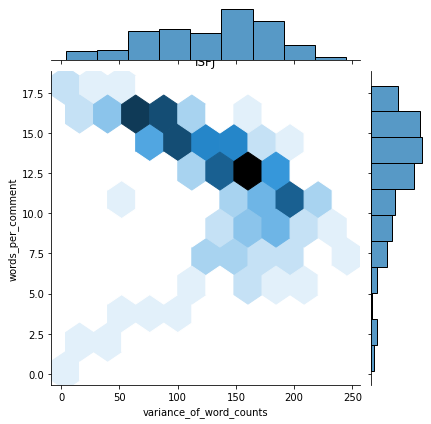

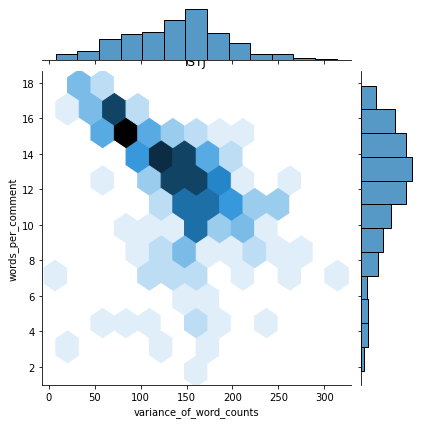

In [ ]:
def plot_jointplot(mbti_type,axs,titles):
    data_1 = data_cpy[data_cpy['type'] == mbti_type]
    sns.jointplot("variance_of_word_counts","words_per_comment",data=data_1,kind="hex",ax=axs,title=titles)

plt.figure(figsize=(28,5))    
i=data_cpy['type'].unique()
k=0

for m in range(1,3):
  for n in range(1,7):
    data_1=data_cpy[data_cpy['type']==i[k]]
    sns.jointplot("variance_of_word_counts","words_per_comment",data=data_1,kind="hex" )
    plt.title(i[k])
    k+=1
plt.show()

For all the plots you can see that most of the posts have words btw 100-150 and most of no. of words per comment by a user is nearly 25 to 30 range.

Exception to this case is for the plots for ISPJ and ISTJ, but this maybe due to the fact that there are significantly less no. of posts available for these personality types (further shown by the bar plots below)

We can see that there is no correlation observed between variance of word count and the words per comment.

But there is a weak negative correlation observed between the 2 features for few personalities. Maybe this could be due to the low no. of posts available for that type in the given Kaggle dataset.

No useful inferences can be made by analyzing the individual jointplots as the total no of posts for each personlaity type is different.

Hence, these features will not be useful in building our Personality prediction model.

**DISTANCE PLOT**

This seaborn visualization method shows the histogram distribution of data for a single column.

Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

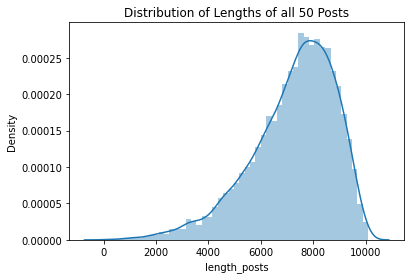

In [ ]:
data_cpy["length_posts"]=data_cpy["posts"].apply(len)
sns.distplot(data_cpy["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

We can see that most no of lengthly posts have between 7000-9000 words.
The line that you see represents the kernel density estimation. It is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. This kernel density estimate is a function defined as the sum of a kernel function on every data point.

In [ ]:
#Finding the most common words in all posts.
words=list(data_cpy["posts"].apply(lambda x: x.split()))
words=[x for y in words for x in y]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

The posts majorly contain general words like : I, I'm, so, me, or, if, and, can etc. It is safe to assume that these words won't really provide any useful information to train the ML model as most of them are stop-words, stem-words, or other useless words.
Hence quite a lot pre-processing is required for individual user posts for each peronality type in the given MBTI dataset

**WORDCLOUD**

WordCloud is a technique to show which words are the most frequent among the given text.

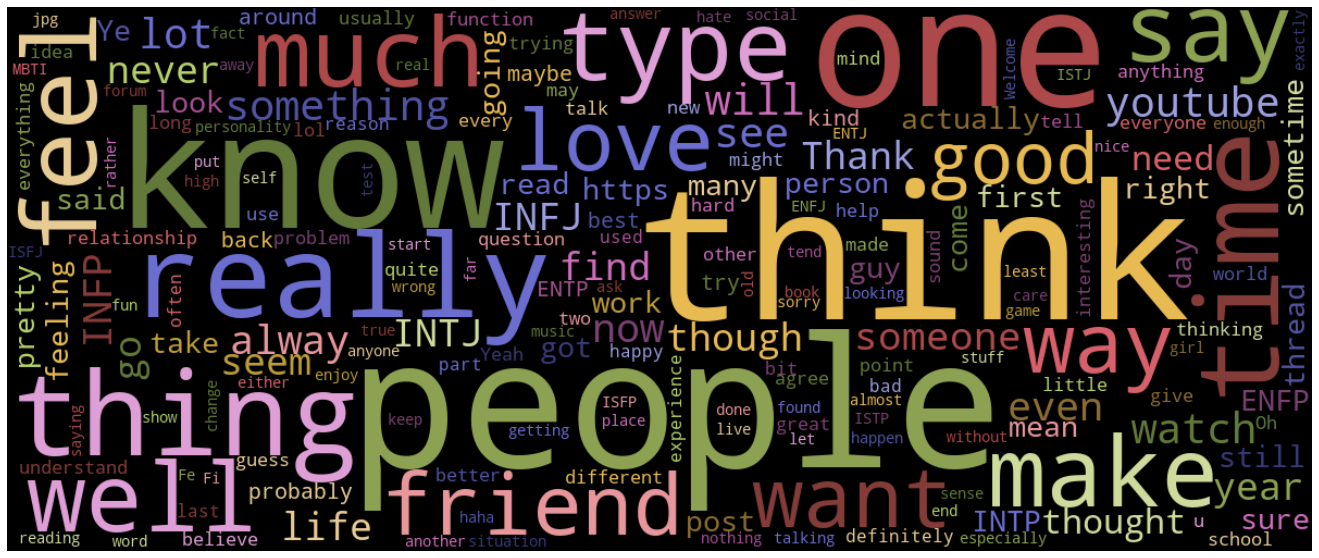

In [ ]:
#Plotting the most common words with WordCloud.
wc=wordcloud.WordCloud(width=1200,height=500,collocations=False,background_color="black",colormap="tab20b").generate(" ".join(words))
#collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

Now we see the Wordclouds for each Personality Type. We produced 16 Word Clouds for 16 groups of personality. These word clouds are generated such that the size of each word is proportional to its appearance frequency in the top posts. We consider these word clouds to be illustrative of some of the unique ways that different MBTIs use language.

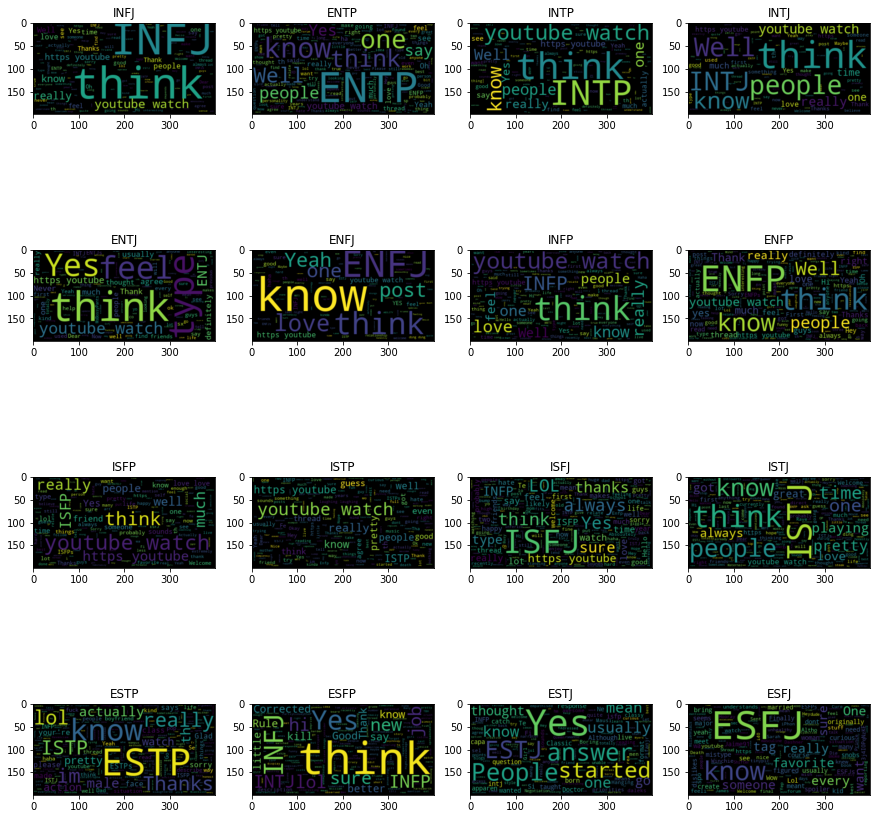

In [ ]:
fig,ax=plt.subplots(len(data_cpy['type'].unique()), sharex=True, figsize=(15,len(data_cpy['type'].unique())))
k = 0
for i in data_cpy['type'].unique():
    df_4 = data_cpy[data_cpy['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

we can see there are a no. of irrelevant words present in the dataset (e.g. ha, ar, Ti etx.) which will need to be removed
Interestingly, among the most common words in the word clouds of individual personality types, is the names of MBTI personlity types themselves.
It would hence be necessary to clean our posts by removing these MBTI words from each of them as part of our pre-processing stage, before training the model for better evaluation results.


Counting the no. of users and posts in the given MBTI Kaggle dataset

In [ ]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
data_cpy.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(data_cpy))
print("Number of posts", len(posts))
print("10 posts from start are:")
posts[0:10]

NameError: ignored

It is inferenced that a lot of hyperlinks are present in these posts
It is safe to assume that url links do not provide any real information about a user's personality, hence, we need to clean our dataset for these too.
This given sample dataset does not come from the entire Kaggle user population; rather, it comes from Kaggle users who leave comments; thus, our ML model's conclusion cannot be applied to all Kaggle users, only to those who leave comments.

Furthermore, with more data, more accurate models could be obtained. As a result, the model may fail to classify a personality at the lower end.

In [ ]:
def preprocess_text(df, remove_special=True):
    texts = df['posts'].copy()
    labels = df['type'].copy()

    #Remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep the End Of Sentence characters
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert posts to lowercase
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove very short or long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove MBTI Personality Words - crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")
    
    return df

#Preprocessing of entered Text
new_data = preprocess_text(data)

In [ ]:
#Remove posts with less than X words
min_words = 15
print("Before : Number of posts", len(new_data)) 
new_data["no. of. words"] = new_data["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
new_data = new_data[new_data["no. of. words"] >= min_words]

print("After : Number of posts", len(new_data))

Before : Number of posts 8675
After : Number of posts 8466


1. LabelEncoder : Provided by Sklearn library that converts the the levels of categorical features (labels) into numeric form so as to convert it into the machine-readable form. It encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [ ]:
# Converting MBTI personality (or target or Y feature) into numerical form using Label Encoding
# encoding personality type
enc = LabelEncoder()
new_data['type of encoding'] = enc.fit_transform(new_data['type'])

target = new_data['type of encoding'] 

In [ ]:
new_data.head(20)

,type,posts,no. of. words,type of encoding
0,INFJ,enfp intj moments sportscenter plays...,430,8
1,ENTP,finding lack these posts very alarming eo...,803,3
2,INTP,good course which know thats bles...,253,11
3,INTJ,dear intp enjoyed conversation other eos...,777,10
4,ENTJ,youre fired eostokendot thats another silly...,402,2
5,INTJ,eostokendot science perfect eostokendo...,245,10
6,INFJ,cant draw nails haha eostokendot those w...,970,8
7,INTJ,tend build collection things desktop th...,140,10
8,INFJ,sure thats good question eostokendot dist...,522,8
9,INTP,this position where have actually pe...,130,11


We choose label encoding over one-hot encoding to reduce the pre-processing time, and majority due to the fact that there are predefined 16 values under MBTI and assigning unique integer based on alphabetical ordering seems like a viable option
It seems like a better option to the curse of dimensionality in the feature space.

In natural language processing, useless words are referred to as stop words.

2. CountVectorizer is used to convert a collection of text documents to a vector of term/token counts and build a vocabulary of known words, but also to encode new documents using that vocabulary. It also enables the pre-processing of text data prior to generating the vector representation.

Here, we use stop_words='english' with CountVectorizer since this just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. This is an important step in pre-processing as our model can often be improved if you don’t take those words into account.

In [ ]:
# Vectorizing the posts for the model and filtering Stop-words
vect=CountVectorizer(stop_words='english') 
# Converting posts (or training or X feature) into numerical form by count vectorization
new_data_2=vect.fit_transform(new_data["posts"])

In [ ]:
new_data_2.shape

(8466, 98555)

So now there are 98555 features in our dataset for 8466 rows (users)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(new_data_2, target, test_size=0.33, stratify=target, random_state=42)
print ((X_train.shape),(Y_train.shape),(X_test.shape),(Y_test.shape))

(5672, 98555) (5672,) (2794, 98555) (2794,)


Now we train the model in multiple ML algorithms namely: Random Forest, XGBoost, in order to choose the classifier which shows the best accuracy results.

In [ ]:
accuracies = {}

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
accuracies['XG Boost'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 59.16%


In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, Y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
accuracies['Random Forest'] = accuracy* 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 37.87%


Accuracy: 16.96%


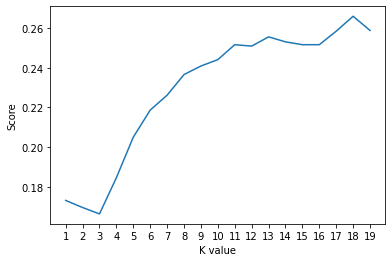

Maximum KNN Score is 26.59%


In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
accuracies['KNN'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, Y_train)
    scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100

print("Maximum KNN Score is {:.2f}%".format(acc))

## Comparing Algorithms

In [ ]:
pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])

,Accuracies(%)
XG Boost,59.162491
Random Forest,37.866858
KNN,16.964925


As we can the above ML classifiers performs at efficieny of nearly 50% only - which is pretty bad. So, instead of selecting all 16 types of personalities as a unique feature, we hence train 4 classifiers individually to classify their personalities based on MBTI type.

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)

In [ ]:
data=pd.read_csv("drive/MyDrive/mbti_1.csv")
#data=pd.read_csv("mbti_1.csv")
data.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


Now we add columns for personality type indicators

In [ ]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


Using the above code, if a person has I, N, T and J, the value across the 4 axis of MBTI i.e. IE, NS, TF and JP respectively, will be 1. Else 0.

This will help us calculate for e.g. how many Introvert posts are present v/s how many Extrovert posts are presnt, out of all the given entries in our labelled Kaggle dataset. This is done in order to extplore the dataset for all the individual Personality Indices of MBTI

**Counting** No. of posts in one class / Total no. of posts in the other class

In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

We infer that there is unequal distribution even among each of the 4 axis in the entries of out dataset. i.e. out of IE:E is the majority, in NS:S is the majority. While TF and JP have realtively less differnce between them.

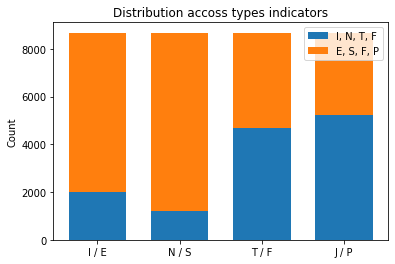

In [ ]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7           # or len(x) can also be used here

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

We can compare this with the fact that Introverts are a minority, making up roughly 16 percent of people. Eventhough among introverts, there are varying degrees, and Carl Jung said, “There is no such thing as a pure Extrovert or a pure introvert" Hence it is tricky to classify a person with 1 type.

While the population is split roughly 50/50 on the other dimensions, a full 70% of people show a preference for Sensing over Intuition when taking a personality test. Because Intuitives are the minority, the onus is on them to adjust to the Sensor way of thinking.

The differences between Judging and Perceiving are probably the most marked differences of all the four preferences. People with strong Judging preferences might have a hard time accepting people with strong Perceiving preferences, and vice-versa. On the other hand, a "mixed" couple (one Perceiving and one Judging) can complement each other very well, if they have developed themselves enough to be able to accept each other's differences.

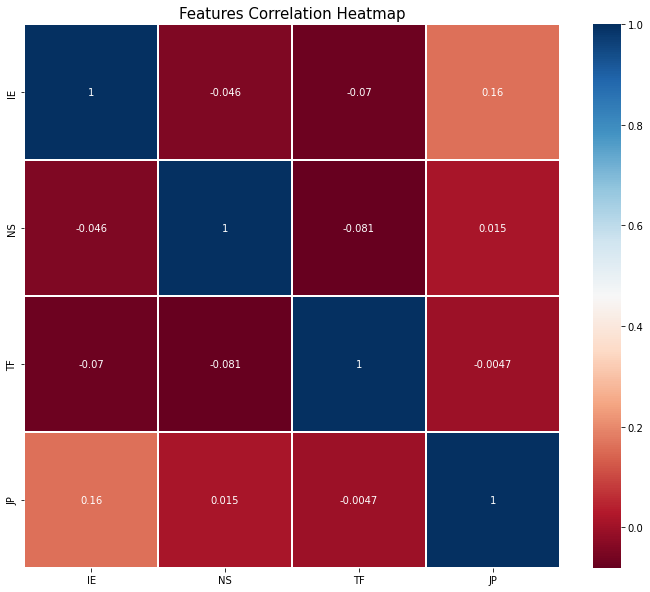

In [ ]:
cmap = plt.cm.RdBu
corr = data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

From this heatmap also, it is unclear if it shows anything valuable for interpretation

##Pre-Processing Stage

We preprocess the posts by using Lemmitization technique. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words, hence we use this instead in our model. So it links words with similar meaning to one word.

In [ ]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Or we can use Label Encoding (as above) of this unique personality type indicator list
# from sklearn.preprocessing import LabelEncoder
# unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
#        'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
# lab_encoder = LabelEncoder().fit(unique_type_list)

In [ ]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


Cleaning of data in the posts


In [ ]:
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0
  
  for row in data.iterrows():
      # check code working 
      # i+=1
      # if (i % 500 == 0 or i == 1 or i == len_data):
      #     print("%s of %s rows" % (i, len_data))

      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [ ]:
nRow, nCol = list_personality.shape
print(f'No. of posts = {nRow}  and No. of Personalities = {nCol} ')

No. of posts = 8675  and No. of Personalities = 4 


##Feature Engineering

Tf–idf for feature engineering evaluates how relevant/important a word is to a document in a collection of documnets or corpus. As we train individual classifiers here, it is very useful for scoring words in machine learning algorithms for Natural Language Processing.

For our model we vectorize using count vectorizer and tf-idf vectorizer keeping the words appearing btw 10% to 70% of the posts.

In [ ]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid')]

Using Tf-idf :
Now the dataset size is as below
(8675, 595)


Therefore we now have 595 features for each user post.

In [ ]:
#counting top 10 words
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
print(top_10)

[166 548 569 439 565 185 561 305 205 476]


We have successfully removed all irrelevant words

##Splitting into X and Y variable

Hence we split the features as :

X: User Posts in TF-IDF representation

Y: Personality type in Binarized MBTI form

In [ ]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


see how the posts look in TF-IDF representation: (we have taken 1st post for demonstration)

In [ ]:
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[0])

see how the posts look in Binarized MBTI personality indicator representation: (we have taken 1st post for demonstration)

In [ ]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])

For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


Therefore we have successfully converted the textual data into numerical form

##Training & Evaluating Models

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
#Random Forest model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

In [ ]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.65%
NS: Intuition (N) / Sensing (S) Accuracy: 86.06%
FT: Feeling (F) / Thinking (T) Accuracy: 68.77%
JP: Judging (J) / Perceiving (P) Accuracy: 64.83%


In [ ]:
#2 KNN model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
   
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 76.67%
NS: Intuition (N) / Sensing (S) Accuracy: 85.82%
FT: Feeling (F) / Thinking (T) Accuracy: 54.70%
JP: Judging (J) / Perceiving (P) Accuracy: 40.20%


**Out of all the models, seen above we see that on an average XG Boost gives relatively good performance, hence we choose it to build our Personality prediction model. This will be beneficial as XGBoost model can even be used to evaluate and report on the performance on a test set for the model during training.**

# PHASE 2

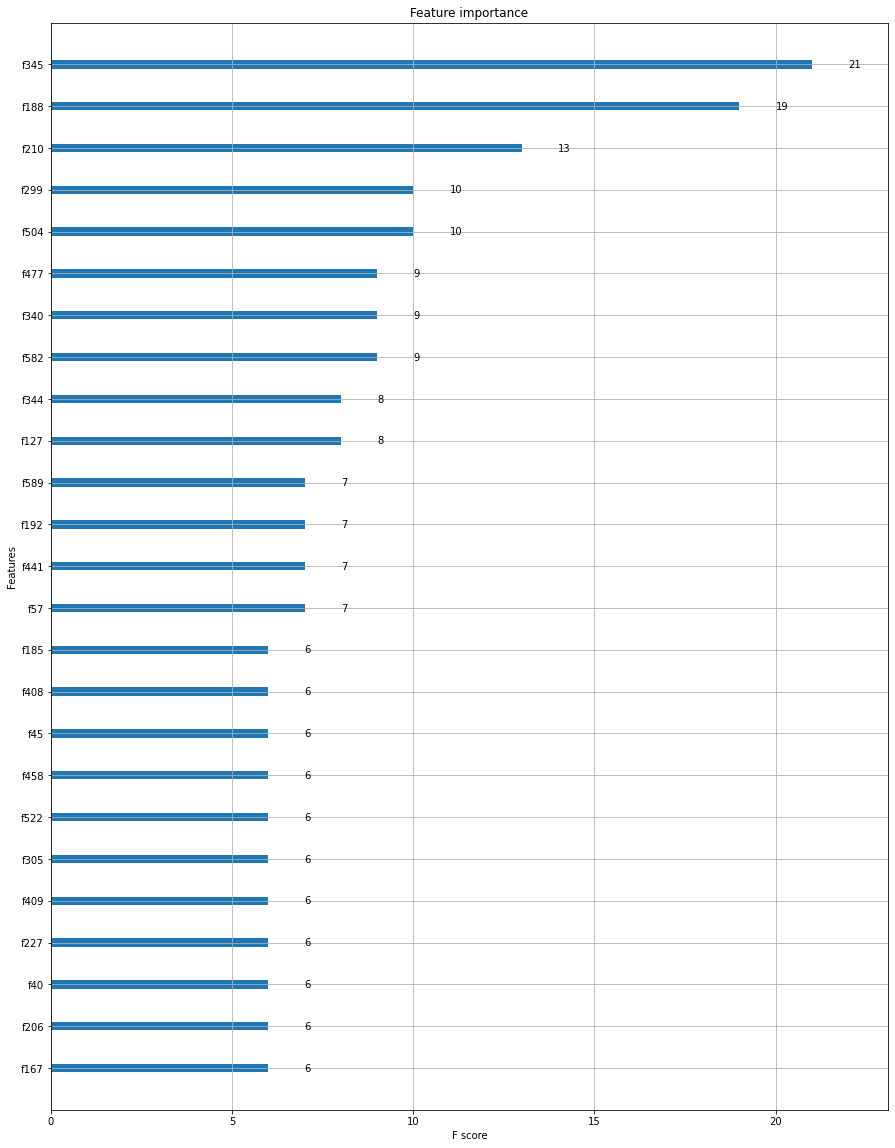

In [ ]:
# Only the 1st indicator
y = list_personality[:,0]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
ax = plot_importance(model, max_num_features=25)

fig = ax.figure
fig.set_size_inches(15, 20)

plt.show()

In [ ]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0],f[1],cntizer.get_feature_names()[f[0]]))
    
# Save xgb_params for late discussuin
default_get_xgb_params = model.get_xgb_params()

167	0.009054	feeling
575	0.007685	without
345	0.007353	ne
340	0.006933	music
146	0.006918	even
582	0.006669	world
472	0.006497	small
192	0.006431	game
127	0.006265	dream
299	0.006250	lol
124	0.006247	difficult
344	0.006243	nature
425	0.006092	remember
409	0.006032	quiet
441	0.006029	school
210	0.005996	guy
293	0.005952	listening
494	0.005877	still
495	0.005856	stop
256	0.005718	issue
57	0.005511	bored
328	0.005422	mind
188	0.005270	fun
28	0.005151	anyway
337	0.005149	mother


"A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

*   Learning rate or shrinkage (learning_rate in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.

* The depth of trees (tree_depth in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.

* Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling."





In [ ]:
# Posts in tf-idf representation
X = X_tfidf

# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2


# Let's train type indicator individually
for l in range(len(personality_type)):
    print("%s ..." % (personality_type[l]))
    
    Y = list_personality[:,l]
    model = XGBClassifier(**param)
    
    param_grid = {
        'n_estimators' : [ 200, 300],
        'learning_rate': [ 0.2, 0.3]
        # 'learning_rate': [ 0.01, 0.1, 0.2, 0.3],
        # 'max_depth': [2,3,4],
    }
    
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
    grid_result = grid_search.fit(X, Y)

    # summarize results
    print("* Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("* %f (%f) with: %r" % (mean, stdev, param))

IE: Introversion (I) / Extroversion (E) ...
* Best: -0.508298 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.508298 (0.012022) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.511190 (0.014109) with: {'learning_rate': 0.2, 'n_estimators': 300}
* -0.515801 (0.013401) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.523666 (0.014271) with: {'learning_rate': 0.3, 'n_estimators': 300}
NS: Intuition (N) / Sensing (S) ...
* Best: -0.395608 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.395608 (0.002532) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.407233 (0.004062) with: {'learning_rate': 0.2, 'n_estimators': 300}
* -0.418423 (0.003287) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.436628 (0.004779) with: {'learning_rate': 0.3, 'n_estimators': 300}
FT: Feeling (F) / Thinking (T) ...
* Best: -0.559850 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.559850 (0.019320) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.566251 (0.021509) w

In [ ]:
# setup parameters for xgboost
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8 
param['learning_rate'] = 0.2

# Individually training each mbti personlity type
for l in range(len(personality_type)):
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.37%
NS: Intuition (N) / Sensing (S) Accuracy: 85.85%
FT: Feeling (F) / Thinking (T) Accuracy: 70.28%
JP: Judging (J) / Perceiving (P) Accuracy: 64.37%


## Personality Prediction 1 - Random post

In [ ]:
my_posts  = """Hey guys! 💕 My name is Sshayni. I am 22 years old, I am a student and I am engaged in Digital art. I believe that we have incredible visual power in our hands. Art is something that can not only change a particular person, art can change the whole world.
The type is just a dummy so that the data prep function can be reused"""
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result))

The result is:  INFP


## Personality Prediction 2 - a poem

In [ ]:
my_posts = """ YELLOW TULIPS

I was walking along the sidewalk in all the daily pain & miserable faces & awful air. Up above in a flower box were yellow tulips, too real to be real, so big and sexual-looking in that funny way flowers always are. I guess they were like heads poking in from another world. How do you like Wednesday, you beautiful things?"""
mydata = pd.DataFrame(data={'type': ['INFP'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result))

The result is:  INFP


## Pesonality Prediction 3 - A tweet

In [ ]:
my_posts  = """ Hi I am 21 years, currently, I am pursuing my graduate degree in computer science and management (Mba Tech CS ), It is a 5-year dual degree.... My CGPA to date is 3.8/4.0 . I have a passion for teaching since childhood. Math has always been the subject of my interest in school. Also, my mother has been one of my biggest inspirations for me. She started her career as a teacher and now has her own education trust with preschools schools in Rural and Urban areas. During the period of lockdown, I dwelled in the field of blogging and content creation on Instagram.  to spread love positivity kindness . I hope I am able deliver my best to the platform and my optimistic attitude helps in the growth that is expected. Thank you for the opportunity. """

mydata = pd.DataFrame(data={'type': ['ENTP'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result)) 

The result is:  INFJ


## On Bill Gates tweets

In [ ]:
my_posts  = """ We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: One of the surprises of the pandemic is how long it took to develop effective treatments—few people thought there would be vaccines before COVID medicines. In this first excerpt from my new book I suggest ways to speed things up during future outbreaks.One of the best parts of my job is learning from innovators and entrepreneurs taking on some of the world's greatest challenges. They make me optimistic about the world’s ability to get to net-zero carbon emissions:The latest #ClimateReport is an important reminder of the work ahead. I’m especially encouraged by the focus on the breakthroughs we need to avoid a climate disaster. (The word “innovation” appears 4,989 times!)Wild polio virus returning to Malawi reminds us that strong health systems are critical for ending disease, stopping re-emergence of diseases we thought were gone, and preventing new diseases from spreading:A world without tuberculosis is attainable if we deliver effective diagnostics & treatment to all who need it. Fully funding The Global Fund will get us on track to end TB and save 20 million more lives.."""
mydata = pd.DataFrame(data={'type': ['ENTP'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result)) 

The result is:  INFP


But according to database 
https://www.personality-database.com/profile/443/bill-gates-technology-mbti-personality-type

and 3.51k votes bill gates is INTP

## Taylor Swift tweets

In [ ]:
my_posts  = """ It never would have been possible to go back & remake my previous work, uncovering lost art & forgotten gems along the way if you hadn’t emboldened me. Red is about to be mine again, but it has always been ours. Now we begin again. Red (my version) is out*don’t say it, don’t say it OKAY I’m saying it:* I’M FEELIN 32. And Alana is feeling 30. Don’t worry we tested everyone! Thank you so much for the birthday wishes, I love you all so much NO PROBLEMS TODAY JUST CHAMPAGNE🥂 I wanted to share this video with you from when 
@aaron_dessner
 and I were doing our fittings for the video and there was a piano, so ofc this happened. SO stoked evermore has been honored like this. Congrats to all our fellow nominees #GRAMMYsSo grateful for 
@Miles_Teller
 for being the greatest dance partner and friend to me. And 
@keleighteller
, who is the coolest living human on planet earth. The bride was willing to risk it all 🥰🧣"""
mydata = pd.DataFrame(data={'type': ['ENTP'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result)) 

The result is:  INFP


But according to database https://www.personality-database.com/profile/1002/taylor-swift-pop-contemporary-mbti-personality-type
and 3.99k votes Taylor Swift should be ESFJ